In [1]:
# importing the MNIST Dataset
from sklearn.datasets import fetch_openml 

In [2]:
import warnings # to filter out warnings

warnings.filterwarnings("ignore")

In [3]:
import numpy as np  # importing the necessary package and libararies
import pandas as pd 
import skimage
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
mnist = fetch_openml(name='mnist_784',version=1)
# fetching the target and features 
X, Y = mnist.data, mnist.target

In [5]:
# shape of features X and target Y
X.shape, Y.shape 

((70000, 784), (70000,))

In [6]:
sample= X[:10] # taking the sample for  first ten images

In [7]:
sample = sample.values # converting it into arrays

In [8]:
# shape of the sample
sample= sample.reshape(-1,28,28)

In [9]:
# creating the function to visualise  images
def show_image(image, cmap_type= 'gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

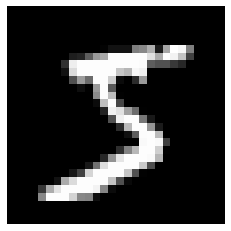

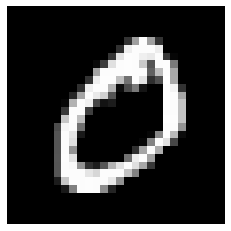

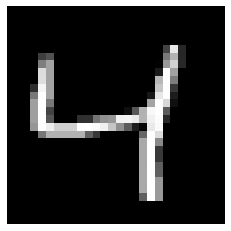

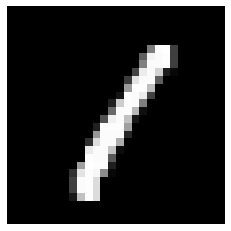

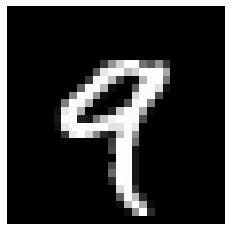

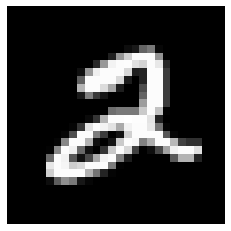

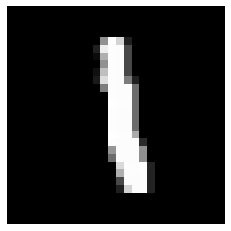

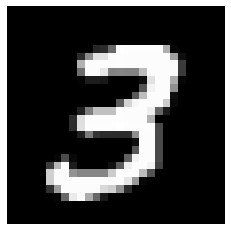

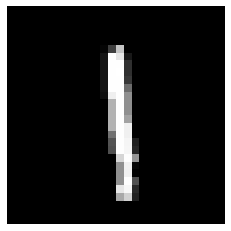

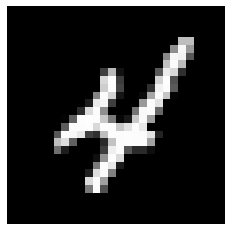

In [10]:
# printing the first ten images
for i in sample:
    show_image(i)


# Ques 2. The dataset currently contains 10 classes. You should split the data into train and test data, where train data should be used for only training the model. You should select any random two classes’ data for develop a binary classification. For instance, you can select 5 and 6.



### Selecting 5 and 6 to build Binary Classification Model.

In [11]:
# selecting pixels only for 5 and 6 from target variable Y and feature set X.
filter_val = Y[Y.isin(['5','6'])].index  # this will return the values as True where 5 and 6 are present

In [12]:
X= X.loc[filter_val]

In [13]:
Y = Y[Y.isin(['5','6'])]

In [14]:
X.shape, Y.shape

((13189, 784), (13189,))

### Find the unique numbers from the train labels

In [15]:
classes = np.unique(Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  2
Output classes :  ['5' '6']


In [16]:
# Change the labels from categorical to binary form
Y1= np.where(Y=='5',0,1)

In [17]:
# Scaling the data to be in same range
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler= MinMaxScaler()

In [19]:
X= scaler.fit_transform(X.values)

### Splitting the data into training and testing

In [20]:
# Splitting the data into training and testing
from sklearn.model_selection import train_test_split

In [21]:
train_X, test_X, train_Y, test_Y= train_test_split(X, Y1, test_size=0.25, random_state=42)

## Modelling 

## A. Build a NN for binary classification with early stopping criteria based on validation loss. Evaluate your model on the test data. Construct a confusion matrix. Present learning curve and include some examples of your prediction

In [22]:
from keras.models import Sequential #importing the necessary modules
from keras.layers import Dense, Dropout
from keras.layers import normalization
import keras

### Model Development

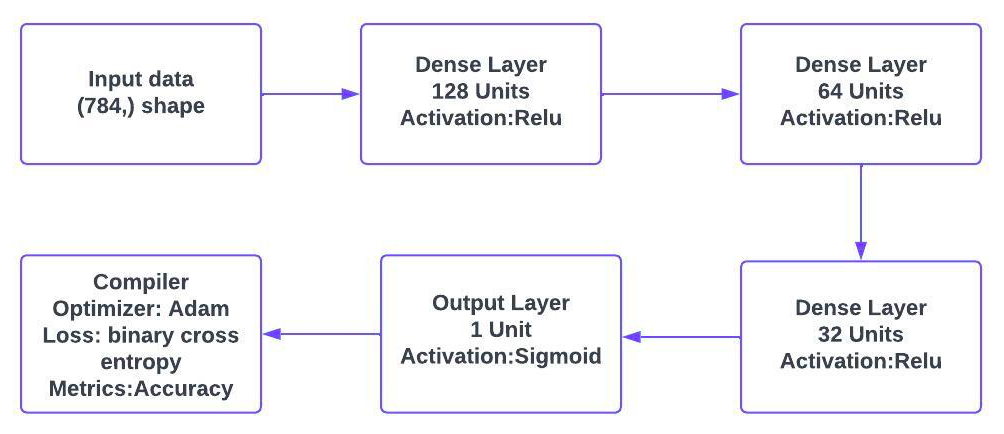

The images are of shape (784,). Images are scaled using MinMaxScaler to have values between 0 and 1 and feed this as an input to the network.
Target variable is binary encoded where 5 is encoded to 0 and 6 is encoded to 1.

Model has three hidden layers layers:

1. The first dense layer has 128 units with activation function Relu. Relu is an activation function commonly used in neural networks that returns 0 for negative inputs and the input itself for positive inputs.
2. The second layer has 64 units
3. The third layer has 32 units
4. Output layer has one unit as it is a binary classification model. Sigmoid is used to classify the data. Sigmoid is an activation function in binary classification problems to produce probabilities. if the probablity is greater than 0.5 then class 1 is prediced else class 0 is predicted.
5. In the compiler stage, 'binary_crossentropy' as the loss function, 'adam' as the optimizer, and 'accuracy' as the metric to evaluate the model's performance. The optimizer 'adam' is an adaptive learning rate optimization algorithm that is commonly used in deep learning. default Learning rate for Adam is 0.001 
6. Model is fitted on the trained data with 20 epochs and batch size 1000 and validation and trained data accuracy and loss is compared to see that model is not overfitting
7. Lastly Early Stopping Criteria is used with patience set at 5 to avoid overfitting of the model. 


### Hyper-Parameters Used

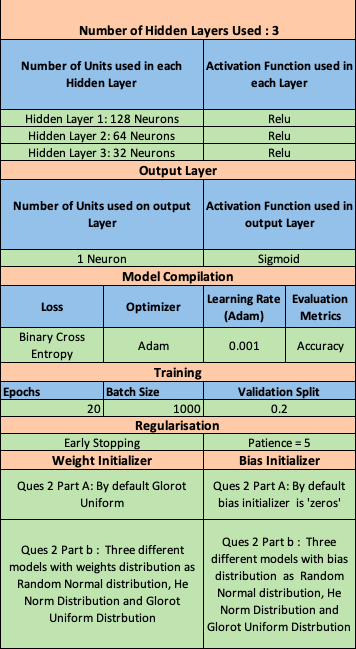

In [23]:
# Creating a new sequential model
model = Sequential()
# Adding and input and dense layer
model.add(Dense(128, input_shape=(784,),activation="relu")) # 128 units in first hidden layer
model.add(Dense(64,activation="relu")) # 64 units in first hidden layer
model.add(Dense(32,activation="relu")) # 32 units in first hidden layer
model.add(Dense(1,activation="sigmoid"))


2023-02-28 13:09:11.088991: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [24]:
# compiling the model with binary cross entropy as the output is in binary form
# default Learning rate for Adam is 0.001
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Summary of the Model

In [25]:
model.summary() #summary of the model showing number of learnable parameters

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 110,849
Trainable params: 110,849
Non-trainable params: 0
_________________________________________________________________


The model is a sequential model with three hidden layers and one output layer. The first layer has 128 units and uses the ReLU activation function, taking an input shape of (784,). The second layer has 64 units and also uses the ReLU activation function. The third layer has 32 units and uses the ReLU activation function as well. The output layer is a dense layer with 1 unit that uses the sigmoid activation function for binary classification.

The model is compiled using binary cross-entropy as the loss function, the Adam optimizer( it computes adaptive learning rates for each parameter and performs both momentum and RMSprop style updates for faster convergence), and accuracy as the evaluation metric.

### Training the Model

In [26]:
# taking batchsize as 1000 and epoch = 20 and training the model without early stopping
# taking the validation split as 20% of the data
digit_model = model.fit(train_X, train_Y, batch_size= 1000, epochs= 20, validation_split= 0.20)

Epoch 1/20
8/8 [==============================] - 1s 59ms/step - loss: 0.4684 - accuracy: 0.8482 - val_loss: 0.2082 - val_accuracy: 0.9540
Epoch 2/20
8/8 [==============================] - 0s 18ms/step - loss: 0.1318 - accuracy: 0.9644 - val_loss: 0.0905 - val_accuracy: 0.9722
Epoch 3/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0728 - accuracy: 0.9751 - val_loss: 0.0704 - val_accuracy: 0.9773
Epoch 4/20
8/8 [==============================] - 0s 17ms/step - loss: 0.0586 - accuracy: 0.9785 - val_loss: 0.0534 - val_accuracy: 0.9813
Epoch 5/20
8/8 [==============================] - 0s 16ms/step - loss: 0.0484 - accuracy: 0.9814 - val_loss: 0.0489 - val_accuracy: 0.9843
Epoch 6/20
8/8 [==============================] - 0s 23ms/step - loss: 0.0403 - accuracy: 0.9861 - val_loss: 0.0452 - val_accuracy: 0.9843
Epoch 7/20
8/8 [==============================] - 0s 22ms/step - loss: 0.0340 - accuracy: 0.9877 - val_loss: 0.0385 - val_accuracy: 0.9869
Epoch 8/20
8/8 [===========

### Evaluation 


In [27]:
# evaluating the performance model on test data
test_eval = model.evaluate(test_X, test_Y)

104/104 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9873


In [28]:
# printing the loss and accuracy value on test data
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.0432598702609539
Test accuracy: 0.9872649908065796


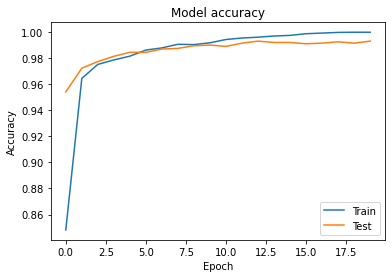

In [29]:
# Plotting train vs validation data accuracy per epoch
plt.figure()
# Getting the model accuracy from keras callback history function
plt.plot(digit_model.history['accuracy'])
plt.plot(digit_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

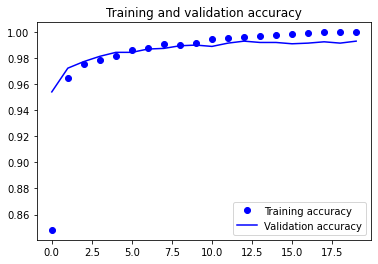

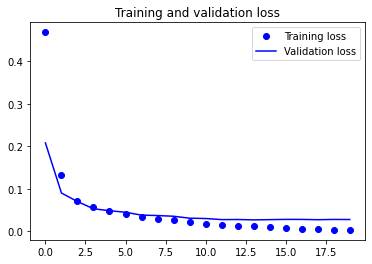

In [30]:
# print both accuracy and loss per ephoch for both training and validation set
accuracy = digit_model.history['accuracy']
val_accuracy = digit_model.history['val_accuracy']
loss = digit_model.history['loss']
val_loss = digit_model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Now using Early Stopping Technique on Validation Loss

In [31]:
# Import early stopping from keras callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# Instantiate an early stopping callback
#The number of epochs to wait before stopping the training process is often referred to as "patience".Setting it to 5
# setting the monitor value as val_loss which will stop training when validation loss will not decrease.
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


## Fitting the same model on training data with Early Stopping Method

In [33]:
# taking batchsize as 1000 and epoch = 20 and training the model with Early stopping
# taking the validation split as 20% of the data
digit_model1 = model.fit(train_X, train_Y, batch_size= 1000, epochs= 20, validation_split= 0.20,callbacks = [early_stopping])

Epoch 1/20
8/8 [==============================] - 0s 30ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.0315 - val_accuracy: 0.9904
Epoch 2/20
8/8 [==============================] - 0s 24ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 0.0279 - val_accuracy: 0.9919
Epoch 3/20
8/8 [==============================] - 0s 18ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 4/20
8/8 [==============================] - 0s 17ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9914
Epoch 5/20
8/8 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0306 - val_accuracy: 0.9924
Epoch 6/20
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - accuracy: 0.9999 - val_loss: 0.0304 - val_accuracy: 0.9929
Epoch 7/20
8/8 [==============================] - 0s 18ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0303 - val_accuracy: 0.9919
Epoch 7: early stopping


In [34]:
# evaluating the performance of model on test data
test_loss, test_acc = model.evaluate(test_X, test_Y)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

104/104 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9876
Test loss: 0.04745715111494064
Test accuracy: 0.987568199634552


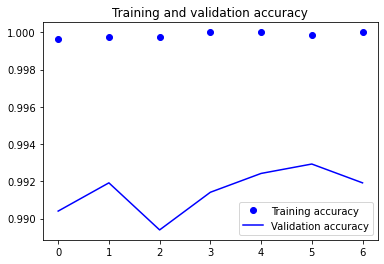

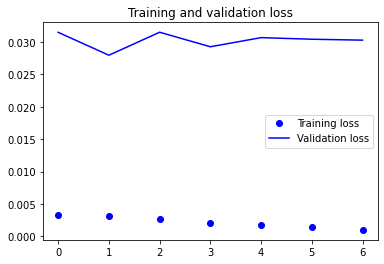

In [35]:
# print both accuracy and loss per epoch for both training and validation set when Early Stopping Method is used.
accuracy = digit_model1.history['accuracy']
val_accuracy = digit_model1.history['val_accuracy']
loss = digit_model1.history['loss']
val_loss = digit_model1.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Prediction

In [36]:
# predicting the values
prediction= model.predict(test_X)

In [37]:
prediction = np.where(prediction>0.5, 1, 0)

In [38]:
# reshaping the data 
prediction1= prediction.reshape(-1,)

In [39]:
# using np.where function to match actual and predicted values. 
#If both are same then it will return the index where both values are same
correct= np.where(prediction1==test_Y)[0] # this returns the correct indices

In [40]:
print("Found %d correct labels out of test data" % len(correct), "where test data has", len(test_Y), "values")

Found 3257 correct labels out of test data where test data has 3298 values


In [41]:
# decoding the predicted value back to 5 and 6 
prediction2 = np.where(prediction1 == 0, 5, 6)

In [42]:
# decoding the test data target  value back to 5 and 6
test_Y2 = np.where(test_Y == 0, 5, 6)

###  Printing the examples of prediction and actual values for first nine digits in the test data

actual value is 6
predicted value is 6


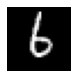

-------------


actual value is 6
predicted value is 6


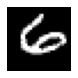

-------------


actual value is 5
predicted value is 5


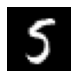

-------------


actual value is 5
predicted value is 5


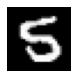

-------------


actual value is 5
predicted value is 5


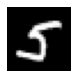

-------------


actual value is 5
predicted value is 5


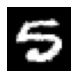

-------------


actual value is 5
predicted value is 5


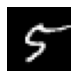

-------------


actual value is 5
predicted value is 5


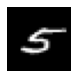

-------------


actual value is 5
predicted value is 5


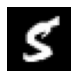

-------------




In [43]:
#printing the actual and predicted values for first nine digits 
for i in range(9): 
    plt.subplot(3,3,i+1)
    print("actual value is", test_Y2[i])
    print("predicted value is", prediction2[i]) 
    show_image(test_X[i].reshape(28,28)) 
    # show_image function was created in the beginning to print images using plt.imshow()
    print("-------------")
    print("\n")

### Confusion Matrix and Performance Score

In [44]:
# importing the module
from sklearn.metrics import confusion_matrix

#printing the confusion matrix
cm = confusion_matrix(test_Y, prediction)
print(cm)


[[1559   29]
 [  12 1698]]


<AxesSubplot:>

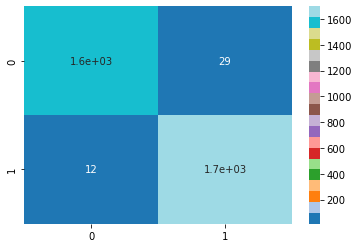

In [45]:
# printing the confusion matrix in heatmap to visualise results
sns.heatmap(cm,annot=True, cmap= 'tab20')

In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [47]:
print("precision is ", precision_score(test_Y, prediction))

precision is  0.9832078749276202


In [48]:
print("recall is ",recall_score(test_Y, prediction))

recall is  0.9929824561403509


In [49]:
print("F1 Score is ", f1_score(test_Y, prediction))

F1 Score is  0.9880709921443119


## Results 

##### Model was bulit with three hidden layers and one output layer. The first hidden layer has 128 units, the second hidden layer has 64 units, and the third hidden layer has 32 units. Each of these hidden layers uses the ReLU activation function, which is one of the efficient activation function in neural networks.
##### As the output is in binary form so the output layer has 1 unit with sigmoid activation function. The sigmoid activation function gives the probability of the positive class.
##### Intitially the model was trained  with 20 epoch and batch size 1000 , without early stopping method. Learning curves was drawn which shows that accuracy for both validation and test data was quite similar. However, after the certain number of epochs validation accuracy doesn't increase much. 
##### In the second method, Early stopping method was used, rest all hyper-parameters and parameters were same. Patience was set to 5 and the model was trained till 6 epoch. Accuracy of the model on test data  was 98.3%. Early stopping techniques helps in avoiding the overfitting of the model. 
##### Values were predicted on the trained model and out of 3298 values 3256 values were correctly predicted. Additionally, first nine Predicted and actual values were printed. 
##### Confusion matrix and other performance metrics was also calculated which tell that the recall score is 99% and F1 score is 98.7%. 

## b. Build three NNs for binary classification using three different weight initializers held other hyperparameters constant.

                                                                 

###  Hyper-parameters and architecture of the model will be same as used in previous problem

In [50]:
# creating the function for the model 
def build_model(weight_init, bias_init):
    # Create a new sequential model with the same  hyper-parameters used above.
    model = Sequential()
    # Adding the weights and bias values with respect to differnt distribution
    model.add(Dense(128, input_shape=(784,),activation="relu", kernel_initializer=weight_init,bias_initializer=bias_init ))
    model.add(Dense(64,activation="relu", kernel_initializer=weight_init, bias_initializer=bias_init))
    model.add(Dense(32,activation="relu", kernel_initializer=weight_init,bias_initializer=bias_init))
    model.add(Dense(1,activation="sigmoid", kernel_initializer=weight_init,bias_initializer=bias_init))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model


In [51]:
#we will build three neural networks with three different weight initializers: 
#random normal, He Norm, and glorot uniform.

# Defining weight initializers
random_normal_weight = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)
random_he_weight = keras.initializers.he_normal(seed= 42)
glorot_uniform_weight = keras.initializers.GlorotUniform(seed=42)

# Defining bias initializers
random_normal_bias = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)
random_he_bias = keras.initializers.he_normal(seed= 42)
glorot_uniform_bias = keras.initializers.GlorotUniform(seed= 42)

# Calling the build_model with different weight initializers and bias initializers
model_random_normal = build_model(random_normal_weight,random_normal_bias )
model_he = build_model(random_he_weight,random_he_bias)
model_glorot_uniform = build_model(glorot_uniform_weight,glorot_uniform_bias)

### Summary of the Model

### summary for model with random normal weights and bias

In [52]:
# summary for model with random normal weights and bias
model_random_normal.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 110,849
Trainable params: 110,849
Non-trainable params: 0
_________________________________________________________________


### summary for model with He Norm weights and bias

In [53]:
# summary for model with He Norm weights and bias
model_he.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 110,849
Trainable params: 110,849
Non-trainable params: 0
_________________________________________________________________


### summary for model with Uniform Glorot weights and bias

In [54]:
# summary for model with Uniform Glorot weights and bias
model_glorot_uniform.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 110,849
Trainable params: 110,849
Non-trainable params: 0
_________________________________________________________________


### Fitting the same model on training data with different weight initializers

In [55]:
# Training the three different models based on diffrent weight and bias distribution
# taking batchsize as 1000 and epoch = 20 with Early Stopping Method having patience set at 5
# taking the validation split as 20% of the data
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

history_random_normal = model_random_normal.fit(train_X, train_Y,batch_size= 1000, epochs= 20, validation_split= 0.20 ,callbacks = [early_stopping])
history_he = model_he.fit(train_X, train_Y,batch_size= 1000, epochs= 20, validation_split= 0.20,callbacks = [early_stopping])
history_glorot_uniform = model_glorot_uniform.fit(train_X, train_Y,batch_size= 1000, epochs= 20, validation_split= 0.20,callbacks = [early_stopping])




Epoch 1/20
8/8 [==============================] - 1s 36ms/step - loss: 0.6798 - accuracy: 0.5302 - val_loss: 0.6486 - val_accuracy: 0.7039
Epoch 2/20
8/8 [==============================] - 0s 14ms/step - loss: 0.5947 - accuracy: 0.8583 - val_loss: 0.4859 - val_accuracy: 0.9414
Epoch 3/20
8/8 [==============================] - 0s 13ms/step - loss: 0.3700 - accuracy: 0.9508 - val_loss: 0.2167 - val_accuracy: 0.9636
Epoch 4/20
8/8 [==============================] - 0s 13ms/step - loss: 0.1473 - accuracy: 0.9666 - val_loss: 0.0945 - val_accuracy: 0.9722
Epoch 5/20
8/8 [==============================] - 0s 23ms/step - loss: 0.0802 - accuracy: 0.9735 - val_loss: 0.0735 - val_accuracy: 0.9757
Epoch 6/20
8/8 [==============================] - 0s 21ms/step - loss: 0.0677 - accuracy: 0.9775 - val_loss: 0.0627 - val_accuracy: 0.9798
Epoch 7/20
8/8 [==============================] - 0s 17ms/step - loss: 0.0583 - accuracy: 0.9793 - val_loss: 0.0549 - val_accuracy: 0.9808
Epoch 8/20
8/8 [===========

In [56]:
# Evaluate the performance of models on test data
test_loss_random_normal, test_acc_random_normal = model_random_normal.evaluate(test_X, test_Y)
test_loss_he, test_acc_he = model_he.evaluate(test_X, test_Y)
test_loss_glorot_uniform, test_acc_glorot_uniform = model_glorot_uniform.evaluate(test_X, test_Y)
print("\n")
print('Test accuracy with random normal initializer:', test_acc_random_normal)
print('Test accuracy with He Norm initializer:', test_acc_he)
print('Test accuracy with glorot uniform initializer:', test_acc_glorot_uniform)

print("-----------------------")
print('Test loss with random normal initializer:', test_loss_random_normal)
print('Test loss with He Norm initializer:', test_loss_he)
print('Test loss with glorot uniform initializer:', test_loss_glorot_uniform)

104/104 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9870


Test accuracy with random normal initializer: 0.9812007546424866
Test accuracy with He Norm initializer: 0.9857489466667175
Test accuracy with glorot uniform initializer: 0.9869617819786072
-----------------------
Test loss with random normal initializer: 0.05651727318763733
Test loss with He Norm initializer: 0.046770159155130386
Test loss with glorot uniform initializer: 0.04478101432323456


## a. Construct three different confusion matrices. 

### Confusion Matrix using normal distributed weights  and bias initialiser

In [57]:
prediction_normal = model_random_normal.predict(test_X)

In [58]:
prediction_normal = np.where(prediction_normal>=0.5,1,0)

In [59]:
cm = confusion_matrix(test_Y, prediction_normal)
print(cm)

[[1561   27]
 [  35 1675]]


<AxesSubplot:>

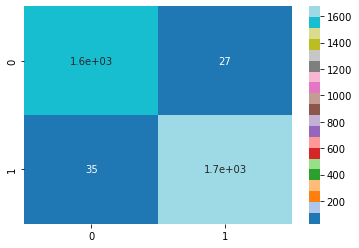

In [60]:
sns.heatmap(cm,annot=True, cmap= 'tab20')

In [61]:
print("Precision score is ", precision_score(test_Y, prediction_normal))

Precision score is  0.9841363102232668


In [62]:
print("Recall score is ", recall_score(test_Y, prediction_normal))

Recall score is  0.97953216374269


In [63]:
print("F1 score is ", f1_score(test_Y, prediction_normal))

F1 score is  0.9818288393903868


### Confusion Matrix using He norm weights and bias initialiser

In [64]:
prediction_he = model_he.predict(test_X)

In [65]:
prediction_he = np.where(prediction_he>=0.5,1,0)

In [66]:
cm = confusion_matrix(test_Y, prediction_he)
print(cm)

[[1560   28]
 [  19 1691]]


<AxesSubplot:>

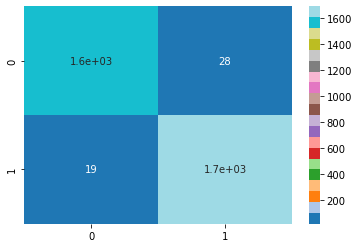

In [67]:
sns.heatmap(cm,annot=True, cmap= 'tab20')

In [68]:
print("Precision score is ", precision_score(test_Y, prediction_he))

Precision score is  0.9837114601512508


In [69]:
print("Recall score is ", recall_score(test_Y, prediction_he))

Recall score is  0.9888888888888889


In [70]:
print("F1 Score is ", f1_score(test_Y, prediction_he))

F1 Score is  0.9862933799941673


### Confusion Matrix using  glorot uniform distributed weights and bias initialiser

In [71]:
prediction_glorot = model_glorot_uniform.predict(test_X)

In [72]:
prediction_glorot = np.where(prediction_glorot>=0.5,1,0)

In [73]:
cm = confusion_matrix(test_Y, prediction_glorot)
print(cm)

[[1564   24]
 [  19 1691]]


<AxesSubplot:>

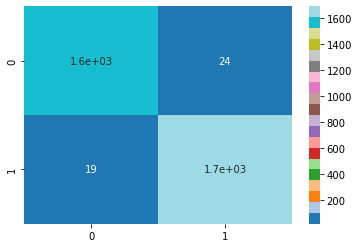

In [74]:
sns.heatmap(cm,annot=True, cmap= 'tab20')

In [75]:
print("precision score is ", precision_score(test_Y, prediction_glorot))

precision score is  0.9860058309037901


In [76]:
print("recall score is", recall_score(test_Y, prediction_glorot))

recall score is 0.9888888888888889


In [77]:
print("F1 score is ", f1_score(test_Y, prediction_glorot))

F1 score is  0.9874452554744526


## b. Show three different learning curves and explain any differences

### Learning Curves using normal distributed weights and bias  initialiser

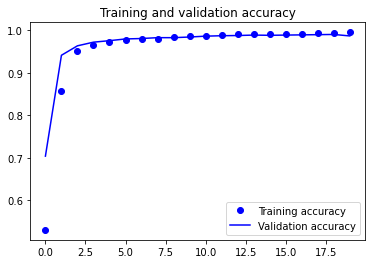

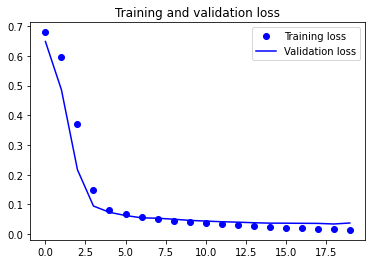

In [78]:
accuracy = history_random_normal.history['accuracy']
val_accuracy = history_random_normal.history['val_accuracy']
loss = history_random_normal.history['loss']
val_loss = history_random_normal.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Learning Curves using He norm weights and bias initialiser

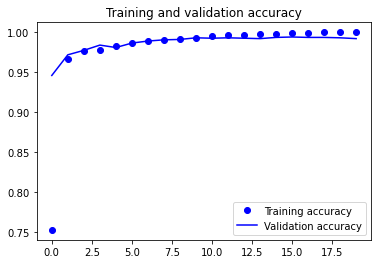

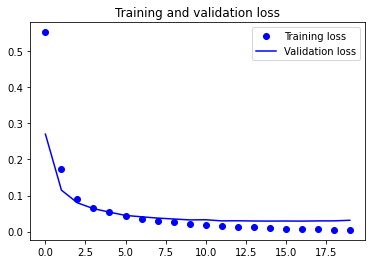

In [79]:
accuracy = history_he.history['accuracy']
val_accuracy = history_he.history['val_accuracy']
loss = history_he.history['loss']
val_loss = history_he.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Learning Curves using glorot uniform distributed weights and bias initialiser

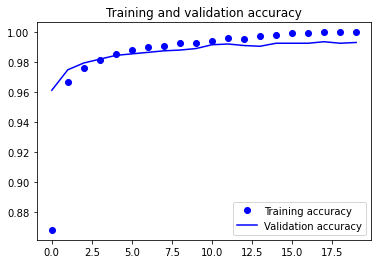

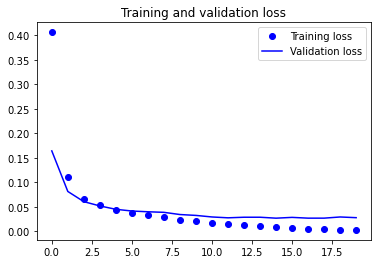

In [80]:
accuracy = history_glorot_uniform.history['accuracy']
val_accuracy = history_glorot_uniform.history['val_accuracy']
loss = history_glorot_uniform.history['loss']
val_loss = history_glorot_uniform.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Comparing Validation Loss and Accuracy for three models

In [81]:
print(history_glorot_uniform.epoch)
print(history_he.epoch)
print(history_random_normal.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [82]:
## taking the min number of common epochs in all three models
epoch1 = max(history_glorot_uniform.epoch)
epoch2= max(history_he.epoch)
epoch3= max(history_random_normal.epoch)

In [83]:
min_number_of_epochs= min(epoch1, epoch2, epoch3)

<Figure size 432x288 with 0 Axes>

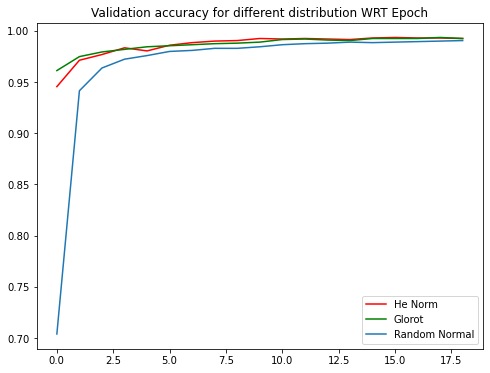

<Figure size 432x288 with 0 Axes>

In [84]:
# Due to early stopping epoch are different all three models. Hence taking the accuracy till 7 epoch which is min in all three models
plt.figure(figsize=(8,6))

plt.plot(epochs[:min_number_of_epochs], history_he.history['val_accuracy'][:min_number_of_epochs], label='He Norm', color= 'red')
plt.plot(epochs[:min_number_of_epochs], history_glorot_uniform.history['val_accuracy'][:min_number_of_epochs], label='Glorot', color='green')
plt.plot(epochs[:min_number_of_epochs], history_random_normal.history['val_accuracy'][:min_number_of_epochs], label='Random Normal')
plt.title('Validation accuracy for different distribution WRT Epoch')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

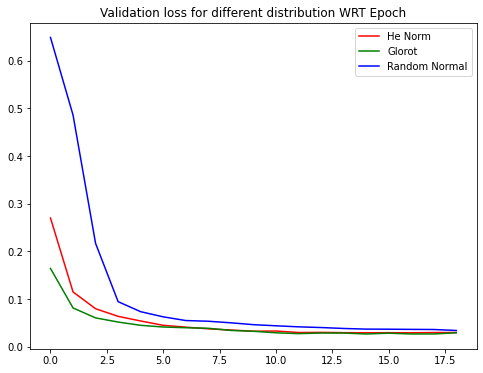

<Figure size 432x288 with 0 Axes>

In [85]:
# Due to early stopping epoch are different all three models. Hence taking the loss till 7 epoch which is min in all three models
plt.figure(figsize=(8,6))
plt.plot(epochs[:min_number_of_epochs], history_he.history['val_loss'][:min_number_of_epochs], 'b', label='He Norm', color= 'red')
plt.plot(epochs[:min_number_of_epochs], history_glorot_uniform.history['val_loss'][:min_number_of_epochs], 'b', label='Glorot', color='green')
plt.plot(epochs[:min_number_of_epochs], history_random_normal.history['val_loss'][:min_number_of_epochs], 'b', label='Random Normal')
plt.title('Validation loss for different distribution WRT Epoch')
plt.legend()
plt.figure()

## c. Show accuracy using bar plots and explain – if there any difference in results for using three different initializers

In [86]:
df = pd.DataFrame({'accuracy': [test_acc_random_normal,test_acc_he,test_acc_glorot_uniform],'weights': ['normal distributed', 'He Norm', 'glorot uniform']})

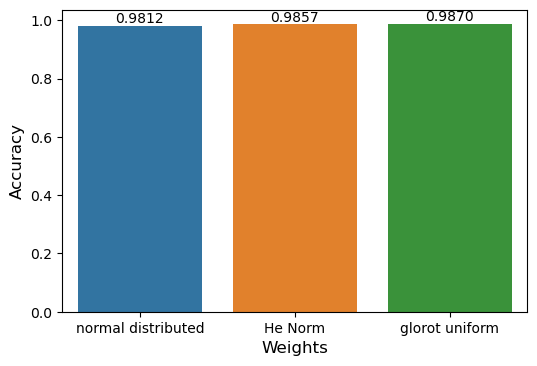

In [87]:
plt.figure(figsize=(6,4), dpi=100)
ax = sns.barplot(data= df, x='weights', y='accuracy')

# Add text on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height()+0.01, f'{p.get_height():.4f}', ha="center")
    
# Show plot
plt.ylabel('Accuracy', size= 12)
plt.xlabel('Weights', size= 12)
plt.show()

In [88]:
print('Test accuracy with random normal initializer:', test_acc_random_normal)
print('Test accuracy with He Norm initializer:', test_acc_he)
print('Test accuracy with glorot uniform initializer:', test_acc_glorot_uniform)

Test accuracy with random normal initializer: 0.9812007546424866
Test accuracy with He Norm initializer: 0.9857489466667175
Test accuracy with glorot uniform initializer: 0.9869617819786072


## Results

##### All parameters of the model was same with reference to previous problem. Diffrent different distrbutions for weight and bias was taken i.e. Random normal, He Norm and Glorot. Confusion matrix, accuracy score and learning curves was plotted for three different distribution.

##### Random normal weight initializer initializes the weights of a neural network layer with random values drawn from a normal distribution with a specified mean and standard deviation.
##### Glorot (Xavier) weight initializer scales the weights by the square root of the number of input and output units to avoid vanishing and exploding gradients during training.
##### He weight initializer is similar to Glorot, but scales the weights by the square root of twice the number of input units to avoid the vanishing gradient problem for layers that use the ReLU activation function.
##### All three models were trained with early stopping criteria set at 5. 
##### With reference to Glorot and He Norm, validation accuracy  score shown similar trend. But overall Glorot has slight higher accuracy as compared to other two.However, we cannnot conclude the results by comparing accuracy only, we need to consider precision and recall as well. Also the accuracy of the model can be tested on another set of unseen data to get accurate results. 
##### In the bar plot, it can be seen that the accuracy on test data was similar to Glorot and He Norm i.e. 98.7% whereas for random normal weight distribution it was 98.3%

# Problem 3 : Build a NN for multi-class classification considering all the classes (10 classes) in the MNIST digit dataset: consider early stopping criteria based on the validation loss and finally construct confusion matrix and discuss the results.

In [89]:
X, Y = mnist.data, mnist.target # importing the feature set and target

In [90]:
X= scaler.fit_transform(X.values) # scaling the features set using MinMaxScaler called earlier

In [91]:
# dividing the data into training and testing
train_X, test_X, train_Y, test_Y= train_test_split(X, Y, test_size=0.25, random_state=42)

In [92]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [93]:
# Changing the labels from categorical to one-hot encoding

train_Y_one_hot = pd.get_dummies(train_Y.values).values
test_Y_one_hot = pd.get_dummies(test_Y.values).values

In [94]:
print('Original label:', train_Y.values[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 3
After conversion to one-hot: [0 0 0 1 0 0 0 0 0 0]


In [95]:
train_X.shape, train_Y_one_hot.shape # shape of training data and target

((52500, 784), (52500, 10))

### Modelling

### Model Development

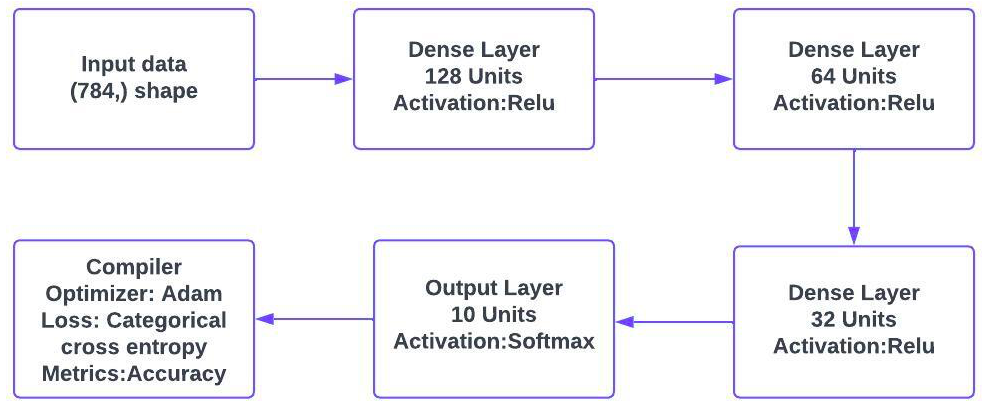

The images are of shape (784,). Images are scaled using MinMaxScaler to have values between 0 and 1 and feed this as an input to the network.
Target variable consists of ten classes numbers from 0 to 9 , is one hot encoded using pd.get_dummies() method. 

Model has three hidden layers layers:

1. The first dense layer has 128 units with activation function Relu. Relu is an activation function commonly used in neural networks that returns 0 for negative inputs and the input itself for positive inputs.
2. The second layer has 64 units.
3. The third layer has 32 units.
4. Output layer has 10 units as it is a multi class classification model. Softmax is used to classify the data. Softmax is a mathematical function that is used to convert a vector of values into a probability distribution. It takes the exponential of each element in the vector and then normalizes them to sum up to 1.
5. In the compiler stage, 'categorical_crossentropy' as the loss function for multi class classification, 'adam' as the optimizer, and 'accuracy' as the metric to evaluate the model's performance. The optimizer 'adam' is an adaptive learning rate optimization algorithm that is commonly used in deep learning. Learning rate was 0.001
6. Model is fitted on the trained data with 20 epochs and batch size 1000 and validation and trained data accuracy and loss is compared to see that model is not overfitting
7. Lastly Early Stopping Criteria is used with patience set at 5 to avoid overfitting of the model. 
8. The predictions made by the model will return probablities for each class, where index for max probablity will be stored to compared it with actual target data with contains digit from 0-9. 


### Hyper-parameters Used

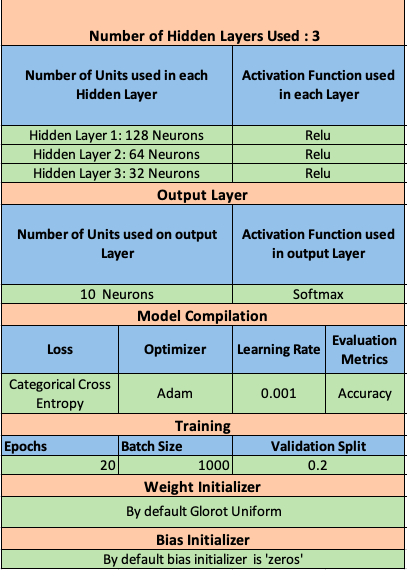

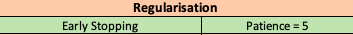

In [96]:
# Create a new sequential model
model = Sequential()
# Adding and input and dense layer
model.add(Dense(128, input_shape=(784,),activation="relu")) # hidden layer with 128 units
model.add(Dense(64,activation="relu")) # hidden layer with 64 units
model.add(Dense(32,activation="relu")) # hidden layer with 32 units
model.add(Dense(10,activation="softmax")) # using softmax for multi class classification
# compiling the model with categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Summary of the Model

In [97]:
# Summary of the Model 

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


The model has four layers: three hidden layers with 128, 64, and 32 units, respectively and one output layer has 10 units, which is the number of classes in the multi-class classification problem. The activation function used in all the hidden layers is ReLU, and the output layer has a softmax activation which is used for multi class classfication. The loss function used for training is categorical cross-entropy, and the optimizer used is Adam. The total number of parameters in the model is 111,146, and all of them are trainable.

### Training

In [98]:
# training the model with batch size 1000 and epoch = 20
digit_model3 = model.fit(train_X, train_Y_one_hot, batch_size= 1000, epochs= 20, validation_split= 0.20)

Epoch 1/20
42/42 [==============================] - 1s 21ms/step - loss: 1.0921 - accuracy: 0.6910 - val_loss: 0.4241 - val_accuracy: 0.8755
Epoch 2/20
42/42 [==============================] - 1s 12ms/step - loss: 0.3191 - accuracy: 0.9091 - val_loss: 0.2697 - val_accuracy: 0.9214
Epoch 3/20
42/42 [==============================] - 1s 16ms/step - loss: 0.2255 - accuracy: 0.9356 - val_loss: 0.2156 - val_accuracy: 0.9387
Epoch 4/20
42/42 [==============================] - 1s 16ms/step - loss: 0.1792 - accuracy: 0.9480 - val_loss: 0.1792 - val_accuracy: 0.9474
Epoch 5/20
42/42 [==============================] - 1s 12ms/step - loss: 0.1474 - accuracy: 0.9579 - val_loss: 0.1567 - val_accuracy: 0.9547
Epoch 6/20
42/42 [==============================] - 1s 14ms/step - loss: 0.1260 - accuracy: 0.9641 - val_loss: 0.1484 - val_accuracy: 0.9570
Epoch 7/20
42/42 [==============================] - 1s 13ms/step - loss: 0.1107 - accuracy: 0.9680 - val_loss: 0.1405 - val_accuracy: 0.9588
Epoch 8/20
42

In [99]:
# testing the performance of model on test data
test_eval = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

547/547 [==============================] - 2s 3ms/step - loss: 0.1017 - accuracy: 0.9709
Test loss: 0.10167831182479858
Test accuracy: 0.9709143042564392


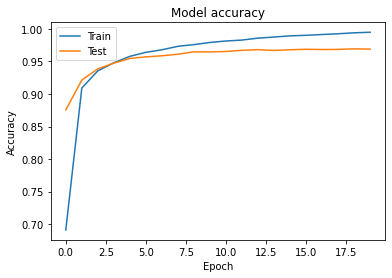

In [100]:
# Plot train vs test accuracy per epoch
plt.figure()
# Using the history metrics from keras callback
plt.plot(digit_model3.history['accuracy'])
plt.plot(digit_model3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

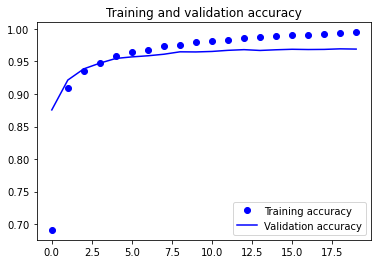

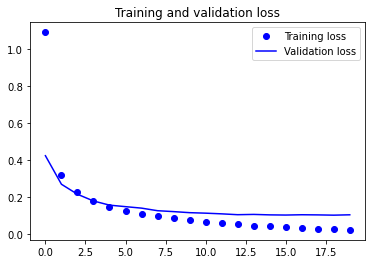

In [101]:
# Plotting accuracy and loss curve for validation and train data at different epochs
# using keras callback history to get accuracy and loss for train and validation set
accuracy = digit_model3.history['accuracy'] 
val_accuracy = digit_model3.history['val_accuracy']
loss = digit_model3.history['loss']
val_loss = digit_model3.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Using early stopping criteria

In [102]:
# Instantiating an early stopping callback
#The number of epochs to wait before stopping the training process is often referred to as "patience".Setting it to 5
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


## Fitting the training data on same model with Early Stopping Method

In [103]:
# train model with early stopping with batchsize =1000 and epochs = 20
digit_model4 = model.fit(train_X, train_Y_one_hot,batch_size= 1000, epochs= 20, validation_split= 0.20, callbacks=[early_stopping])

Epoch 1/20
42/42 [==============================] - 1s 25ms/step - loss: 0.0205 - accuracy: 0.9955 - val_loss: 0.1023 - val_accuracy: 0.9706
Epoch 2/20
42/42 [==============================] - 1s 17ms/step - loss: 0.0183 - accuracy: 0.9961 - val_loss: 0.1038 - val_accuracy: 0.9714
Epoch 3/20
42/42 [==============================] - 1s 16ms/step - loss: 0.0159 - accuracy: 0.9970 - val_loss: 0.1038 - val_accuracy: 0.9696
Epoch 4/20
42/42 [==============================] - 1s 16ms/step - loss: 0.0136 - accuracy: 0.9978 - val_loss: 0.1059 - val_accuracy: 0.9706
Epoch 5/20
42/42 [==============================] - 1s 13ms/step - loss: 0.0130 - accuracy: 0.9981 - val_loss: 0.1069 - val_accuracy: 0.9701
Epoch 6/20
42/42 [==============================] - 1s 14ms/step - loss: 0.0114 - accuracy: 0.9983 - val_loss: 0.1116 - val_accuracy: 0.9699
Epoch 6: early stopping


In [104]:
# evaluate the performance of model on test data
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

547/547 [==============================] - 1s 3ms/step - loss: 0.1060 - accuracy: 0.9725
Test loss: 0.10600771009922028
Test accuracy: 0.972514271736145


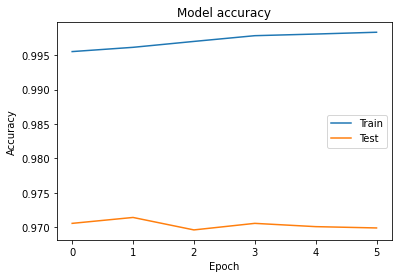

In [105]:
# Plot train vs test accuracy per epoch
plt.figure()
# Using the history metrics from keras callback
plt.plot(digit_model4.history['accuracy'])
plt.plot(digit_model4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

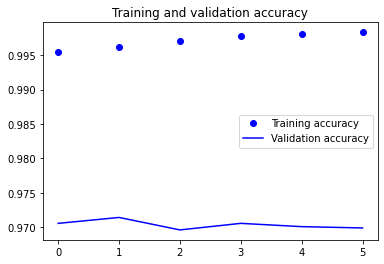

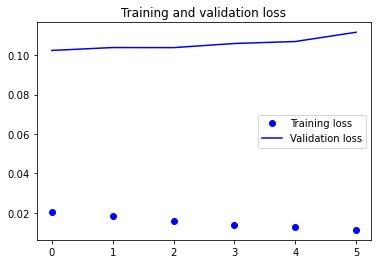

In [106]:
# Plotting accuracy and loss curve for validation and train data at different epochs
# using keras callback history to get accuracy and loss for train and validation set
accuracy = digit_model4.history['accuracy']
val_accuracy = digit_model4.history['val_accuracy']
loss = digit_model4.history['loss']
val_loss = digit_model4.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Prediction

In [107]:
# predicting the probablities for all class 
prediction= model.predict(test_X) 

#### using np.argmax to get the index of max probablity value for the specific class.As the target values is one hot encoded, the returned index from predictions will map to the index of one hot encoded which will give the number. For example, if the predicted output for a given input is [0, 0, 0.8, 0.2, 0, 0, 0, 0, 0, 0], the np.argmax() function will return 2, which is the index of the maximum value in the predicted vector. Since the classes are numbered from 0 to 9 in this case, the predicted class label is 2, which corresponds to the digit 2.

In [108]:

prediction = np.argmax(np.round(prediction),axis=1)

In [109]:
# converting string format to integer
test_Y= test_Y.values.astype(int)

In [110]:
test_Y

array([8, 4, 8, ..., 5, 8, 2])

In [111]:
# using np.where function to match actual and predicted values. 
#If both are same then it will return the index where both values are same
correct = np.where(prediction==test_Y)[0] # this returns the indices
print("Found %d correct labels" % len(correct), "where test data has", len(test_Y), "values")

Found 17006 correct labels where test data has 17500 values


Actual Value is 8
Predicted Value is  8


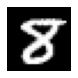

------------------


Actual Value is 4
Predicted Value is  4


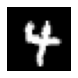

------------------


Actual Value is 8
Predicted Value is  8


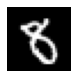

------------------


Actual Value is 7
Predicted Value is  7


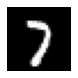

------------------


Actual Value is 7
Predicted Value is  7


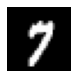

------------------


Actual Value is 0
Predicted Value is  0


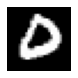

------------------


Actual Value is 6
Predicted Value is  6


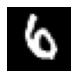

------------------


Actual Value is 2
Predicted Value is  2


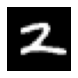

------------------


Actual Value is 7
Predicted Value is  7


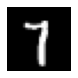

------------------




In [112]:
# Printing first nine predicted and actual values
for i in range(9):
    print("Actual Value is" ,test_Y[i]) # test data 
    print("Predicted Value is ",prediction[i]) # predictions
    plt.subplot(3,3,i+1)
    show_image(test_X[i].reshape(28,28))
    print("------------------")
    print("\n")

### Confusion Matrix and Performance Score

In [113]:
cm = confusion_matrix(test_Y, prediction) 
#printing the confusion matrix to see corrrect and wrong predicted values
print(cm)

[[1672    1    6    0    1    7   11    1   12    3]
 [   5 1944   10    3    2    0    1    4    7    1]
 [   5    4 1720    5    4    4    0   10    7    2]
 [  15    0   15 1731    0   14    1   11   14    5]
 [   3    1    4    0 1554    0    2    4    4   15]
 [   8    2    1   17    4 1545   16    0    9    5]
 [   8    0    2    0    7    2 1734    1    7    0]
 [   8    1   16    0    6    3    0 1831    0   13]
 [   5    6    3    9    6    1    6    4 1609    8]
 [  16    2    1    9   29    2    0   16   11 1666]]


<AxesSubplot:>

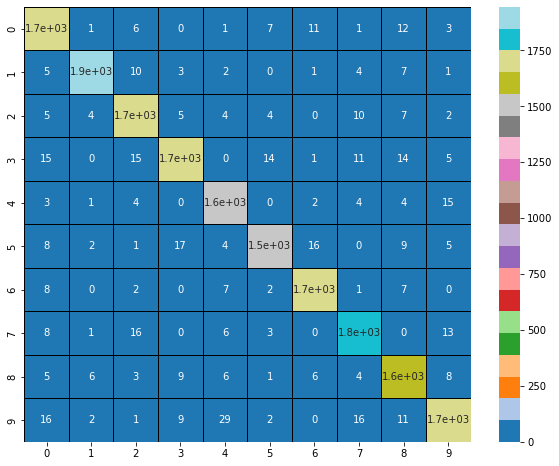

In [114]:
plt.figure(figsize=(10,8)) # visualising the confusion matrix in heatmap
sns.heatmap(cm,annot=True, cmap= 'tab20',linewidths=1, linecolor= 'black')

In [115]:
print("Precision Score is ", precision_score(test_Y, prediction, average = 'weighted'))

Precision Score is  0.9718595341097959


In [116]:
print("Recall Score is ", recall_score(test_Y, prediction, average = 'weighted')) 

Recall Score is  0.9717714285714286


In [117]:
print("F1 Score is " ,f1_score(test_Y, prediction, average = 'weighted'))

F1 Score is  0.971768123010657


##  Results

##### This is a multi class classification problem in which sequential model was built with three hidden layers with 128,64 and 32 units. The output layers had ten classes as it is a multi class classification problem. Intially the model was trained without early stopping method and the accuracy on test data was 96.96%. Learning curves for trained data and validation data was also drawn. 
##### Then in the next stage Early stopping method was used with patience set to 5 and accuracy on test data was 97%. The model performed better and learning curves for loss and accuracy was also drawn. Also the model predicted 16976 correct labels where test data has 17500 values. This shows the efficiency of the model. Confusion matrix was also plotted and precision and recall score is 97% and 97% respectively. 
##### Lastly, first nine values in test data was printed for actual and predicted values to visualise the numbers. First nine numbers were correctly predicted and printed by the model as shown above.

## Summary

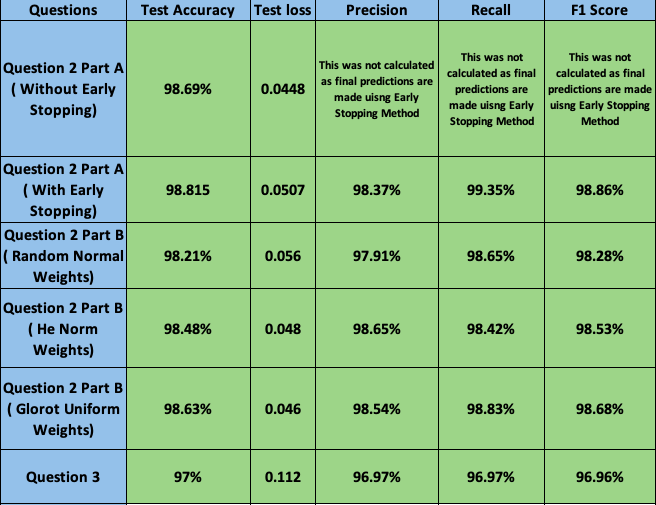

#### From the above figure we can see the test accuracy for different models. In ques 2 part A, when the model was trained without early stopping test accuracy was slightly low as compared to when early stopping method was used. 
#### For Ques2 Part B, we can see the test accuracy was slightly higher for Glorot Distribution.
#### For Ques 3, we were able to correctly predict numbers using softmax for multi class classification